#K - MEANS CLUSTER
  

In [ ]:
# Imports
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100, centers=3, n_features=2,cluster_std=0.2, random_state=0)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [ ]:
# Get the cluster centroids
print("Cluster Centriods are\n",kmeans.cluster_centers_)

Cluster Centriods are
 [[ 0.95164831  4.28882085]
 [ 2.0720792   0.98848385]
 [-1.538563    2.91165191]]


In [ ]:
# Get the cluster labels
# gives cluster number which is it assigned to
print("Cluster Labels are:\n",kmeans.labels_)

Cluster Labels are:
 [1 0 1 ... 0 2 2]


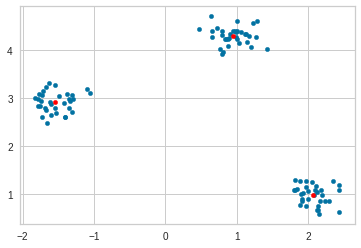

In [ ]:
# Plotting the cluster centers and the data points on a 2D plane
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],s=20)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=20)
plt.show()

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print("silhouette score is :-\n",silhouette_score(X,Y))

silhouette score is :-
 0.8816040239688525


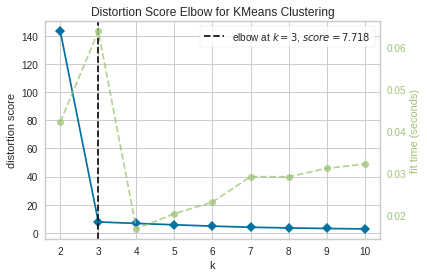

In [ ]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
X_temp, y_temp = make_blobs(n_samples=1000, centers=3, n_features=2,cluster_std=0.2, random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
model = KMeans()
# Fit the data and visualize
visualizer = KElbowVisualizer(model)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([1], dtype=int32)

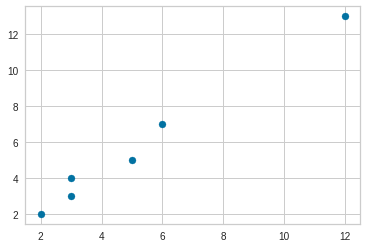

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
#X1.shape()
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[8,8]])

#Hand Written Digit Recognition

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits() #load the dataset in digits

In [ ]:
 #Dataset loaded is a dictionary
print(digits.keys())
# data : flattened arrays/tensors used for clustering
# target : label associated with flattened array
X = digits.data
Y = digits.target
print(X.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


In [ ]:
#flattened data for 3 images of the dataset
digits.data[0:3]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.]])

In [ ]:
#run KMeans clustering on digits.data for 1797 records and 64 features
k_means = KMeans(n_clusters=10, random_state=114).fit(X)

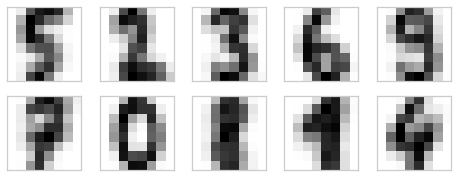

In [ ]:
#Create a figure and a set of subplots( 2 rows and 5 columns)
fig, ax = plt.subplots(2, 5, figsize = (8,3)) 
centers = k_means.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8 matrix
#ax.flat:flattening the image &␣ plotting relevant centers
for axi, center in zip(ax.flat, centers): 
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)

In [ ]:
labels = np.zeros_like(Y) 
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
  mask = (Y == i)
#if a specific digit belongs to/equivalent a specific cluster then its True else False
  print(mask)
  labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[ True False False ... False False False]
[False  True False ... False False False]
[False False  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True False  True]
[False False False ... False  True False]


In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print("silhouette score is :-\n",silhouette_score(X,Y))

silhouette score is :-
 0.1629432052257522


In [ ]:

score = metrics.accuracy_score(y_test,k_means.predict(X_test))

NameError: ignored